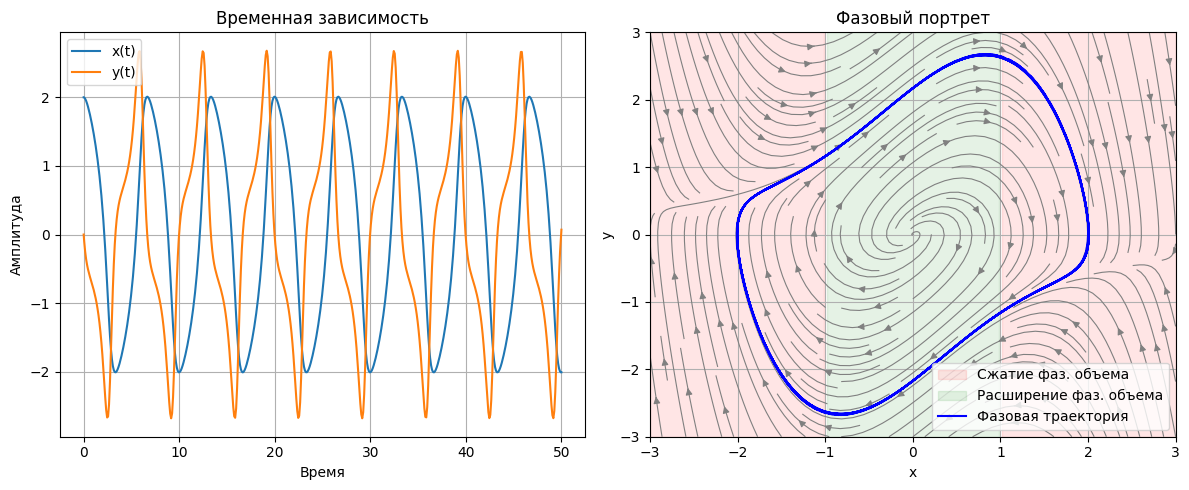

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Параметры системы
λ = 1.0
x0 = [2.0, 0.0]  # Начальные условия [x, y]
t_span = [0, 50]  # Временной интервал

# Определение уравнения Ван-дер-Поля
def van_der_pol(t, state):
    x, y = state
    dxdt = y
    dydt = (λ - x**2)*y - x
    return [dxdt, dydt]

# Решение ОДУ
sol = solve_ivp(van_der_pol, t_span, x0, max_step=0.1)

# Визуализация временной зависимости
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[0], label='x(t)')
plt.plot(sol.t, sol.y[1], label='y(t)')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.title('Временная зависимость')
plt.legend()
plt.grid(True)

# Фазовый портрет и векторное поле
plt.subplot(1, 2, 2)

# Построение векторного поля
x = np.linspace(-3, 3, 20)
y = np.linspace(-3, 3, 20)
X, Y = np.meshgrid(x, y)
DX, DY = van_der_pol(0, [X, Y])

# Области сжатия/расширения
xx = np.linspace(-3, 3, 400)
plt.fill_between(xx, -3, 3, where=(np.abs(xx) > np.sqrt(λ)), 
                color='red', alpha=0.1, label='Сжатие фаз. объема')
plt.fill_between(xx, -3, 3, where=(np.abs(xx) < np.sqrt(λ)), 
                color='green', alpha=0.1, label='Расширение фаз. объема')

# Построение фазовой траектории и векторного поля
plt.streamplot(X, Y, DX, DY, color='gray', density=1.5, linewidth=0.8)
plt.plot(sol.y[0], sol.y[1], 'b', label='Фазовая траектория')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Фазовый портрет')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()